# Malnutrition detection 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
import pandas as pd

# 🗂️ dataset paths
base_path = r"C:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\datasets"

# ✅ Load datasets
df1 = pd.read_excel(f"{base_path}\\JME_Country_Estimates_April_2021.xlsx")
df2 = pd.read_excel(f"{base_path}\\Joint-Malnutrition-Estimates-Regional-and-Global-Estimates-April-2021.xlsx")
df3 = pd.read_csv(f"{base_path}\\Malnutrition data.csv")
df4 = pd.read_excel(f"{base_path}\\UNICEF_WHO_WB_Global_Expanded_Database_Stunting_Wasting_Overweight_April_2021.xlsx")
df5 = pd.read_excel(f"{base_path}\\UNICEF_WHO_WB_Global_Expanded_Databases_Overweight_April_2021.xlsx")
df6 = pd.read_excel(f"{base_path}\\UNICEF_WHO_WB_Global_Expanded_Databases_Severe_Wasting_April_2021.xlsx")
df7 = pd.read_excel(f"{base_path}\\UNICEF_WHO_WB_Global_Expanded_Databases_Stunting_April_2021.xlsx")
df8 = pd.read_excel(f"{base_path}\\UNICEF_WHO_WB_Global_Expanded_Databases_Wasting_April_2021.xlsx")

# 🧠 Example: Combine everything into one master DataFrame (if structures match)
combined_df = pd.concat([df3], axis=0)  # Start with the main clean dataset

# You can now selectively extract useful columns from others and append them to combined_df as needed


In [4]:
import pandas as pd

# 📁 Base directory
base_path = r"C:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\datasets"

# 📂 Dataset paths and labels
dataset_files = {
    "jme_country": "JME_Country_Estimates_April_2021.xlsx",
    "jme_regional": "Joint-Malnutrition-Estimates-Regional-and-Global-Estimates-April-2021.xlsx",
    "main_csv": "Malnutrition data.csv",
    "global_combined": "UNICEF_WHO_WB_Global_Expanded_Database_Stunting_Wasting_Overweight_April_2021.xlsx",
    "overweight": "UNICEF_WHO_WB_Global_Expanded_Databases_Overweight_April_2021.xlsx",
    "severe_wasting": "UNICEF_WHO_WB_Global_Expanded_Databases_Severe_Wasting_April_2021.xlsx",
    "stunting": "UNICEF_WHO_WB_Global_Expanded_Databases_Stunting_April_2021.xlsx",
    "wasting": "UNICEF_WHO_WB_Global_Expanded_Databases_Wasting_April_2021.xlsx"
}

# 🧠 Load datasets
datasets = {}
for key, filename in dataset_files.items():
    file_path = f"{base_path}\\{filename}"
    print(f"🔄 Loading: {key}")
    
    try:
        if filename.endswith(".csv"):
            datasets[key] = pd.read_csv(file_path)
        else:
            datasets[key] = pd.read_excel(file_path, engine="openpyxl")  # Safe loading
        print(f"✅ Loaded '{key}' with shape {datasets[key].shape}")
    except Exception as e:
        print(f"❌ Failed to load {key}: {e}")


🔄 Loading: jme_country
✅ Loaded 'jme_country' with shape (79, 9)
🔄 Loading: jme_regional
✅ Loaded 'jme_regional' with shape (116, 66)
🔄 Loading: main_csv
✅ Loaded 'main_csv' with shape (837, 8)
🔄 Loading: global_combined
✅ Loaded 'global_combined' with shape (71, 7)
🔄 Loading: overweight
✅ Loaded 'overweight' with shape (100, 2)
🔄 Loading: severe_wasting
✅ Loaded 'severe_wasting' with shape (100, 2)
🔄 Loading: stunting
✅ Loaded 'stunting' with shape (99, 2)
🔄 Loading: wasting
✅ Loaded 'wasting' with shape (99, 2)


In [5]:
# ✅ Show first 5 rows of each dataset
for key, df in datasets.items():
    print(f"\n📄 Dataset: {key}")
    print(df.head())


📄 Dataset: jme_country
         Unnamed: 0 Unnamed: 1 Unnamed: 2                     Unnamed: 3  \
0               NaN        NaN        NaN                            NaN   
1               NaN        NaN        NaN                            NaN   
2               NaN        NaN        NaN                            NaN   
3  data.unicef.org         NaN        NaN  who.int/nutgrowthdb/estimates   
4               NaN        NaN        NaN                            NaN   

  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7          Unnamed: 8  
0        NaN         NaN         NaN         NaN                 NaN  
1        NaN         NaN         NaN         NaN                 NaN  
2        NaN         NaN         NaN         NaN                 NaN  
3        NaN         NaN         NaN         NaN  data.worldbank.org  
4        NaN         NaN         NaN         NaN                 NaN  

📄 Dataset: jme_regional
                Unnamed: 0  Unnamed: 1  \
0                      NaN

In [6]:
import pandas as pd

# Load the Survey Estimates sheet
file_path = "C:/Users/jnthn/OneDrive/Desktop/Project Source Codes/Malnutrition-Detection-Project-using-ML/backend/datasets/JME_Country_Estimates_April_2021.xlsx"
survey_estimates = pd.read_excel(file_path, sheet_name="Survey Estimates", engine="openpyxl")

# Columns to keep
columns_to_keep = [
    "Country and areas", "Survey year", "Year*", "United Nations Region",
    "Stunting", "Wasting", "Underweight", "Overweight", "U5 Population ('000s)"
]

# Clean and rename
cleaned_survey = survey_estimates[columns_to_keep].copy()
cleaned_survey.columns = [
    "Country", "SurveyYear", "Year", "Region",
    "Stunting", "Wasting", "Underweight", "Overweight", "U5_Pop_Thousands"
]

# Drop rows with missing values in any key indicators
cleaned_survey.dropna(subset=["Stunting", "Wasting", "Underweight", "Overweight"], inplace=True)

# Save cleaned file
cleaned_output_path = "C:/Users/jnthn/OneDrive/Desktop/Project Source Codes/Malnutrition-Detection-Project-using-ML/backend/datasets/Cleaned_JME_Survey_Estimates.xlsx"
cleaned_survey.to_excel(cleaned_output_path, index=False)

print("✅ Cleaned data saved to:")
print(cleaned_output_path)

# Optional preview
cleaned_survey.head()


✅ Cleaned data saved to:
C:/Users/jnthn/OneDrive/Desktop/Project Source Codes/Malnutrition-Detection-Project-using-ML/backend/datasets/Cleaned_JME_Survey_Estimates.xlsx


,Country,SurveyYear,Year,Region,Stunting,Wasting,Underweight,Overweight,U5_Pop_Thousands
0,AFGHANISTAN,1997,1997,Asia,53.2,18.2,44.9,6.5,3838.876953
1,AFGHANISTAN,2004,2004,Asia,59.3,8.6,32.9,4.6,4789.353027
2,AFGHANISTAN,2013,2013,Asia,40.4,9.5,24.6,5.3,5444.572754
3,AFGHANISTAN,2018,2018,Asia,38.2,5.1,19.1,4.1,5601.442871
4,ANGOLA,1996,1996,Africa,61.1,7.7,36.2,1.7,2749.750000


In [ ]:
##malnutrition.head()

,Sex,Age,Height,Weight,Low Income,Lower Middle Income,Upper Middle Income,Status
0,1,5,75,17,1,0,0,Stunting
1,0,4,101,13,1,0,0,Stunting
2,0,4,71,17,1,0,0,Stunting
3,0,3,81,13,0,0,1,Stunting
4,0,1,79,16,0,0,1,Stunting


In [1]:
import pandas as pd

# Load the Excel file (make sure the path is correct for your system)
file_path = r"C:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\datasets\Joint-Malnutrition-Estimates-Regional-and-Global-Estimates-April-2021.xlsx"

# Load the "Stunting - Prevalence" sheet, skipping metadata rows (headers are on row 14 = index 13)
df_raw = pd.read_excel(file_path, sheet_name="Stunting - Prevalence", header=13)

# Clean out columns that are completely empty
df_raw.dropna(axis=1, how='all', inplace=True)

# Drop rows that are completely empty
df_raw.dropna(axis=0, how='all', inplace=True)

# Rename the first column to 'Region'
df_raw.rename(columns={df_raw.columns[0]: 'Region'}, inplace=True)

# Remove the next row if it contains header descriptors like "footnote", "Upper bound", etc.
if "footnote" in df_raw.iloc[0].astype(str).str.lower().to_string():
    df_raw = df_raw.iloc[1:].reset_index(drop=True)

# Build list of years manually from what we know (2000 to 2020 in 5-year intervals + 2019)
years = [2000, 2005, 2010, 2012, 2015, 2019, 2020]
data_cols = []

# Manually extract the correct columns from wide format
# Each year has 3 columns: % stunted, Lower bound, Upper bound
col_index = 1  # Start from column index 1 (after 'Region')

for year in years:
    try:
        data_cols.append({
            "year": year,
            "%_Stunted": df_raw.columns[col_index],
            "Lower_Bound": df_raw.columns[col_index + 1],
            "Upper_Bound": df_raw.columns[col_index + 2]
        })
        col_index += 4  # Move to the next group (skip footnote col if any)
    except IndexError:
        print(f"Could not extract columns for year {year}. Check the column layout.")
        break

# Reshape data into long format
long_format_data = []

for entry in data_cols:
    year = entry["year"]
    for _, row in df_raw.iterrows():
        region = row["Region"]
        try:
            long_format_data.append({
                "Region": region,
                "Year": year,
                "%_Stunted": row[entry["%_Stunted"]],
                "Lower_Bound": row[entry["Lower_Bound"]],
                "Upper_Bound": row[entry["Upper_Bound"]]
            })
        except KeyError:
            continue  # Skip if any column isn't found

# Create final DataFrame
df_clean = pd.DataFrame(long_format_data)

# Drop rows with missing values (important for ML training)
df_clean.dropna(inplace=True)

# Optional: filter out non-country regions if needed
non_countries = ["Global", "United Nations", "Africa", "Asia", "Europe", "Americas", "Oceania"]
df_clean = df_clean[~df_clean["Region"].isin(non_countries)]

# Display or save cleaned data
print(df_clean.head())

# Save to CSV for ML usage
df_clean.to_csv("cleaned_stunting_data.csv", index=False)


            Region  Year %_Stunted Lower_Bound Upper_Bound
5   Eastern Africa  2000      49.1        48.1        50.1
6    Middle Africa  2000      44.9        43.3        46.6
7  Northern Africa  2000      28.3        26.4        30.3
8  Southern Africa  2000      29.1        27.1        31.3
9   Western Africa  2000      39.9        38.1        41.8


In [2]:
import pandas as pd

# Define path to your local file
file_path = r"C:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\datasets\UNICEF_WHO_WB_Global_Expanded_Database_Stunting_Wasting_Overweight_April_2021.xlsx"

# Load the 'Trend' sheet using the correct header row (8th row = index 7)
df = pd.read_excel(file_path, sheet_name="Trend", header=7)

# Drop completely empty columns and rows
df.dropna(axis=1, how='all', inplace=True)
df.dropna(axis=0, how='all', inplace=True)

# Rename relevant columns to clean ML-friendly names
df.rename(columns={
    "Unnamed: 2": "Country",
    "Unnamed: 1": "ISO3Code",
    "Unnamed: 3": "UNICEF_Region",
    "Unnamed: 5": "Survey_Year",
    "(WHZ <-2 but HAZ ≥-2)": "Wasted_Only",
    "(WHZ <-2 AND HAZ <-2)": "Wasted_And_Stunted",
    "HAZ<-2 but WHZ≥-2 AND WHZ ≤+2": "Stunted_Only",
    "WHZ > +2 but HAZ ≥-2": "Overweight_Only",
    "WHZ≥-2 AND WHZ ≤+2 AND HAZ ≥-2": "Free_From_All"
}, inplace=True)

# Keep only useful columns
ml_data = df[[
    "Country", "ISO3Code", "UNICEF_Region", "Survey_Year",
    "Wasted_Only", "Wasted_And_Stunted", "Stunted_Only",
    "Overweight_Only", "Free_From_All"
]]

# Drop the top row if it still contains column keys like 'ANT_...'
if ml_data.iloc[0].astype(str).str.contains("ANT_").any():
    ml_data = ml_data.iloc[1:].reset_index(drop=True)

# Drop any rows that have missing values in required columns
ml_data.dropna(inplace=True)

# Convert numeric columns to floats (in case they are stored as strings)
numeric_cols = ["Wasted_Only", "Wasted_And_Stunted", "Stunted_Only", "Overweight_Only", "Free_From_All"]
ml_data[numeric_cols] = ml_data[numeric_cols].astype(float)

# Optional: Save the cleaned dataset to CSV
ml_data.to_csv("cleaned_global_malnutrition_data.csv", index=False)

# Preview
print(ml_data.head())


       Country ISO3Code UNICEF_Region Survey_Year  Wasted_Only  \
0  Afghanistan      AFG            SA        2013          6.4   
1  Afghanistan      AFG            SA        2018          3.5   
2      Albania      ALB          EECA        2000          9.4   
3      Albania      ALB          EECA        2005          6.6   
4      Albania      ALB          EECA        2009          9.2   

   Wasted_And_Stunted  Stunted_Only  Overweight_Only  Free_From_All  
0                 3.2          33.8              3.4           51.3  
1                 1.6          34.3              2.3           56.5  
2                 2.8          19.8             16.6           37.9  
3                 0.7          13.8             12.2           54.1  
4                 0.4          12.6             10.2           54.6  


In [6]:
import pandas as pd

# Path to your dataset
file_path = r"C:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\datasets\UNICEF_WHO_WB_Global_Expanded_Databases_Overweight_April_2021.xlsx"

# Load the "Trend" sheet using header row at index 8 (i.e., row 9 in Excel)
df = pd.read_excel(file_path, sheet_name="Trend", header=8)

# Drop fully empty rows and columns
df.dropna(axis=0, how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# Rename key columns for clarity
df.rename(columns={
    "CountryName": "Country",
    "ISO3Code": "ISO3Code",
    "UNICEF_Reporting_Sub_Region": "UNICEF_Region",
    "CMRS_year": "Survey_Year",
    "National_r": "Overweight_Percentage",
    "National_ll": "Lower_Bound",
    "National_ul": "Upper_Bound"
}, inplace=True)

# Extract only the ML-relevant columns
ml_data = df[[
    "Country", "ISO3Code", "UNICEF_Region", "Survey_Year",
    "Overweight_Percentage", "Lower_Bound", "Upper_Bound"
]]

# Drop rows with missing or malformed values
ml_data.dropna(inplace=True)

# Convert numerical fields to float
ml_data["Overweight_Percentage"] = pd.to_numeric(ml_data["Overweight_Percentage"], errors="coerce")
ml_data["Lower_Bound"] = pd.to_numeric(ml_data["Lower_Bound"], errors="coerce")
ml_data["Upper_Bound"] = pd.to_numeric(ml_data["Upper_Bound"], errors="coerce")

# Drop rows where conversion failed
ml_data.dropna(subset=["Overweight_Percentage", "Lower_Bound", "Upper_Bound"], inplace=True)

# Save cleaned data to CSV
ml_data.to_csv("cleaned_overweight_prevalence_data.csv", index=False)

# Print a sample of the cleaned data
print("Preview of Cleaned Overweight Prevalence Data:")
print(ml_data.head())


Preview of Cleaned Overweight Prevalence Data:
       Country ISO3Code UNICEF_Region  Survey_Year  Overweight_Percentage  \
2  Afghanistan      AFG            SA         2013               5.341543   
3  Afghanistan      AFG            SA         2018               4.112625   
5      Albania      ALB          EECA         2000              30.063820   
6      Albania      ALB          EECA         2005              24.837180   
7      Albania      ALB          EECA         2009              23.235070   

   Lower_Bound  Upper_Bound  
2     4.748376     6.004138  
3     3.484750     4.847946  
5    26.435520    33.960210  
6    21.467290    28.543800  
7    20.269860    26.489940  


C:\Users\jnthn\AppData\Local\Temp\ipykernel_21588\3535161802.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_data.dropna(inplace=True)
C:\Users\jnthn\AppData\Local\Temp\ipykernel_21588\3535161802.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_data["Overweight_Percentage"] = pd.to_numeric(ml_data["Overweight_Percentage"], errors="coerce")
C:\Users\jnthn\AppData\Local\Temp\ipykernel_21588\3535161802.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [7]:
import pandas as pd

# File path to the severe wasting Excel file
file_path = r"C:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\datasets\UNICEF_WHO_WB_Global_Expanded_Databases_Severe_Wasting_April_2021.xlsx"

# Load the 'Trend' sheet using the correct header row (row index 8 = row 9 in Excel)
df = pd.read_excel(file_path, sheet_name="Trend", header=8)

# Drop fully empty rows and columns
df.dropna(axis=0, how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# Rename important columns
df.rename(columns={
    "CountryName": "Country",
    "ISO3Code": "ISO3Code",
    "UNICEF_Reporting_Sub_Region": "UNICEF_Region",
    "CMRS_year": "Survey_Year",
    "National_r": "Severe_Wasting_Percentage",
    "National_ll": "Lower_Bound",
    "National_ul": "Upper_Bound"
}, inplace=True)

# Extract only the necessary columns for ML
ml_data = df[[
    "Country", "ISO3Code", "UNICEF_Region", "Survey_Year",
    "Severe_Wasting_Percentage", "Lower_Bound", "Upper_Bound"
]]

# Drop rows with missing values in essential columns
ml_data.dropna(inplace=True)

# Convert numerical fields to float safely
ml_data["Severe_Wasting_Percentage"] = pd.to_numeric(ml_data["Severe_Wasting_Percentage"], errors='coerce')
ml_data["Lower_Bound"] = pd.to_numeric(ml_data["Lower_Bound"], errors='coerce')
ml_data["Upper_Bound"] = pd.to_numeric(ml_data["Upper_Bound"], errors='coerce')

# Drop rows where numeric conversion failed
ml_data.dropna(subset=["Severe_Wasting_Percentage", "Lower_Bound", "Upper_Bound"], inplace=True)

# Save the cleaned dataset to CSV
ml_data.to_csv("cleaned_severe_wasting_data.csv", index=False)

# Show preview of cleaned dataset
print("Preview of Cleaned Severe Wasting Data:")
print(ml_data.head())


Preview of Cleaned Severe Wasting Data:
       Country ISO3Code UNICEF_Region  Survey_Year  Severe_Wasting_Percentage  \
1  Afghanistan      AFG            SA         2013                   3.983989   
2  Afghanistan      AFG            SA         2018                   1.563857   
3      Albania      ALB          EECA         2000                   6.183120   
4      Albania      ALB          EECA         2005                   3.675108   
5      Albania      ALB          EECA         2009                   5.934900   

   Lower_Bound  Upper_Bound  
1     3.470130     4.570339  
2     1.321630     1.849647  
3     4.530028     8.386466  
4     2.531434     5.307348  
5     4.195184     8.333310  


C:\Users\jnthn\AppData\Local\Temp\ipykernel_21588\3227610913.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_data.dropna(inplace=True)
C:\Users\jnthn\AppData\Local\Temp\ipykernel_21588\3227610913.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_data["Severe_Wasting_Percentage"] = pd.to_numeric(ml_data["Severe_Wasting_Percentage"], errors='coerce')
C:\Users\jnthn\AppData\Local\Temp\ipykernel_21588\3227610913.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [8]:
import pandas as pd

# File path to the Stunting dataset
file_path = r"C:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\datasets\UNICEF_WHO_WB_Global_Expanded_Databases_Stunting_April_2021.xlsx"

# Load the 'Trend' sheet with header on row 9 (index 8)
df = pd.read_excel(file_path, sheet_name="Trend", header=8)

# Drop empty rows and columns
df.dropna(axis=0, how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# Rename useful columns
df.rename(columns={
    "CountryName": "Country",
    "ISO3Code": "ISO3Code",
    "UNICEF_Reporting_Sub_Region": "UNICEF_Region",
    "CMRS_year": "Survey_Year",
    "National_r": "Stunting_Percentage",
    "National_ll": "Lower_Bound",
    "National_ul": "Upper_Bound"
}, inplace=True)

# Extract the relevant columns
ml_data = df[[
    "Country", "ISO3Code", "UNICEF_Region", "Survey_Year",
    "Stunting_Percentage", "Lower_Bound", "Upper_Bound"
]]

# Drop rows with nulls in important fields
ml_data.dropna(inplace=True)

# Convert numeric columns to float
ml_data["Stunting_Percentage"] = pd.to_numeric(ml_data["Stunting_Percentage"], errors='coerce')
ml_data["Lower_Bound"] = pd.to_numeric(ml_data["Lower_Bound"], errors='coerce')
ml_data["Upper_Bound"] = pd.to_numeric(ml_data["Upper_Bound"], errors='coerce')

# Drop rows that couldn't convert
ml_data.dropna(subset=["Stunting_Percentage", "Lower_Bound", "Upper_Bound"], inplace=True)

# Save cleaned file
ml_data.to_csv("cleaned_stunting_data(only).csv", index=False)

# Show preview
print("Preview of Cleaned Stunting Data:")
print(ml_data.head())


Preview of Cleaned Stunting Data:
       Country ISO3Code UNICEF_Region  Survey_Year  Stunting_Percentage  \
2  Afghanistan      AFG            SA         2013             40.41354   
3  Afghanistan      AFG            SA         2018             38.19278   
5      Albania      ALB          EECA         2000             39.15548   
6      Albania      ALB          EECA         2005             26.71661   
7      Albania      ALB          EECA         2009             23.18753   

   Lower_Bound  Upper_Bound  
2     38.89955     41.94601  
3     36.52543     39.88840  
5     34.99911     43.47529  
6     23.61614     30.06393  
7     20.35095     26.28899  


C:\Users\jnthn\AppData\Local\Temp\ipykernel_21588\328519263.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_data.dropna(inplace=True)
C:\Users\jnthn\AppData\Local\Temp\ipykernel_21588\328519263.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_data["Stunting_Percentage"] = pd.to_numeric(ml_data["Stunting_Percentage"], errors='coerce')
C:\Users\jnthn\AppData\Local\Temp\ipykernel_21588\328519263.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [9]:
import pandas as pd

# File path to the Wasting dataset
file_path = r"C:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\datasets\UNICEF_WHO_WB_Global_Expanded_Databases_Wasting_April_2021.xlsx"

# Load 'Trend' sheet with header row at index 8 (row 9 in Excel)
df = pd.read_excel(file_path, sheet_name="Trend", header=8)

# Drop fully empty rows and columns
df.dropna(axis=0, how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# Rename columns for clarity
df.rename(columns={
    "CountryName": "Country",
    "ISO3Code": "ISO3Code",
    "UNICEF_Reporting_Sub_Region": "UNICEF_Region",
    "CMRS_year": "Survey_Year",
    "National_r": "Wasting_Percentage",
    "National_ll": "Lower_Bound",
    "National_ul": "Upper_Bound"
}, inplace=True)

# Select only the needed columns
ml_data = df[[
    "Country", "ISO3Code", "UNICEF_Region", "Survey_Year",
    "Wasting_Percentage", "Lower_Bound", "Upper_Bound"
]]

# Drop rows with missing values in key fields
ml_data.dropna(inplace=True)

# Convert numeric columns to float
ml_data["Wasting_Percentage"] = pd.to_numeric(ml_data["Wasting_Percentage"], errors='coerce')
ml_data["Lower_Bound"] = pd.to_numeric(ml_data["Lower_Bound"], errors='coerce')
ml_data["Upper_Bound"] = pd.to_numeric(ml_data["Upper_Bound"], errors='coerce')

# Drop rows where conversion failed
ml_data.dropna(subset=["Wasting_Percentage", "Lower_Bound", "Upper_Bound"], inplace=True)

# Save to CSV
ml_data.to_csv("cleaned_wasting_data.csv", index=False)

# Show preview
print("Preview of Cleaned Wasting Data:")
print(ml_data.head())


Preview of Cleaned Wasting Data:
       Country ISO3Code UNICEF_Region  Survey_Year  Wasting_Percentage  \
2  Afghanistan      AFG            SA         2013            9.534487   
3  Afghanistan      AFG            SA         2018            5.131169   
5      Albania      ALB          EECA         2000           12.240720   
6      Albania      ALB          EECA         2005            7.324687   
7      Albania      ALB          EECA         2009            9.579505   

   Lower_Bound  Upper_Bound  
2     8.731534    10.402860  
3     4.691071     5.610125  
5     9.379331    15.822620  
6     5.603194     9.521732  
7     7.540545    12.097660  


C:\Users\jnthn\AppData\Local\Temp\ipykernel_21588\4210812688.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_data.dropna(inplace=True)
C:\Users\jnthn\AppData\Local\Temp\ipykernel_21588\4210812688.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_data["Wasting_Percentage"] = pd.to_numeric(ml_data["Wasting_Percentage"], errors='coerce')
C:\Users\jnthn\AppData\Local\Temp\ipykernel_21588\4210812688.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [6]:
# Checking the number of entries and any missing values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Columns: 745 entries, UNICEF_Survey_ID to Region_63_Footnote
dtypes: float64(549), int64(2), object(194)
memory usage: 5.4+ MB


In [8]:
# Dealing with categorical data

In [11]:
df['Sex'].value_counts()

KeyError: 'Sex'

In [14]:
# Quick check: print column names to find inconsistencies
print("STUNTING:", stunting.columns.tolist())
print("WASTING:", wasting.columns.tolist())
print("SEVERE WASTING:", severe_wasting.columns.tolist())
print("OVERWEIGHT:", overweight.columns.tolist())
print("JME EXCEL:", jme_excel.columns.tolist())


STUNTING: ['Region', 'Year', '%_Stunted', 'Lower_Bound', 'Upper_Bound']
WASTING: ['Country', 'ISO3Code', 'UNICEF_Region', 'Survey_Year', 'Wasting_Percentage', 'Lower_Bound', 'Upper_Bound']
SEVERE WASTING: ['Country', 'ISO3Code', 'UNICEF_Region', 'Survey_Year', 'Severe_Wasting_Percentage', 'Lower_Bound', 'Upper_Bound']
OVERWEIGHT: ['Country', 'ISO3Code', 'UNICEF_Region', 'Survey_Year', 'Overweight_Percentage', 'Lower_Bound', 'Upper_Bound']
JME EXCEL: ['Country', 'SurveyYear', 'Year', 'Region', 'Stunting', 'Wasting', 'Underweight', 'Overweight', 'U5_Pop_Thousands']


In [15]:
# === Fix STUNTING ===
# Rename 'Region' → 'Country' and 'Year' → 'Survey_Year'
stunting.rename(columns={
    "Region": "Country",
    "Year": "Survey_Year",
    "%_Stunted": "Stunting_Percentage"
}, inplace=True)

# Add placeholder columns to match others
stunting["ISO3Code"] = None
stunting["UNICEF_Region"] = None

# Rearrange columns to match merge keys
stunting = stunting[["Country", "ISO3Code", "UNICEF_Region", "Survey_Year", "Stunting_Percentage", "Lower_Bound", "Upper_Bound"]]

# === Fix JME Excel ===
jme_excel.rename(columns={
    "SurveyYear": "Survey_Year",
    "Region": "UNICEF_Region"
}, inplace=True)


In [17]:
# === Rename bound columns to prevent conflicts ===
stunting.rename(columns={
    "Lower_Bound": "Stunting_Lower_Bound",
    "Upper_Bound": "Stunting_Upper_Bound"
}, inplace=True)

wasting.rename(columns={
    "Lower_Bound": "Wasting_Lower_Bound",
    "Upper_Bound": "Wasting_Upper_Bound"
}, inplace=True)

severe_wasting.rename(columns={
    "Lower_Bound": "Severe_Lower_Bound",
    "Upper_Bound": "Severe_Upper_Bound"
}, inplace=True)

overweight.rename(columns={
    "Lower_Bound": "Overweight_Lower_Bound",
    "Upper_Bound": "Overweight_Upper_Bound"
}, inplace=True)


In [21]:
# Force consistent data type for merge key
for df in [stunting, wasting, severe_wasting, overweight, jme_excel]:
    df["Survey_Year"] = pd.to_numeric(df["Survey_Year"], errors='coerce')  # converts to float or NaN
    df.dropna(subset=["Survey_Year"], inplace=True)
    df["Survey_Year"] = df["Survey_Year"].astype(int)  # make sure it's int


In [22]:
merge_keys = ["Country", "ISO3Code", "UNICEF_Region", "Survey_Year"]

merged = stunting.merge(wasting, on=merge_keys, how='outer')
merged = merged.merge(severe_wasting, on=merge_keys, how='outer')
merged = merged.merge(overweight, on=merge_keys, how='outer')
merged = merged.merge(jme_excel, on=["Country", "UNICEF_Region", "Survey_Year"], how='outer')

merged.to_csv("final_merged_malnutrition_data.csv", index=False)
print("✅ Final merged data preview:")
print(merged.head())


✅ Final merged data preview:
       Country ISO3Code UNICEF_Region  Survey_Year  Stunting_Percentage  \
0  AFGHANISTAN      NaN          Asia         1997                  NaN   
1  AFGHANISTAN      NaN          Asia         2004                  NaN   
2  AFGHANISTAN      NaN          Asia         2013                  NaN   
3  AFGHANISTAN      NaN          Asia         2018                  NaN   
4      ALBANIA      NaN        Europe         2000                  NaN   

   Stunting_Lower_Bound  Stunting_Upper_Bound  Wasting_Percentage  \
0                   NaN                   NaN                 NaN   
1                   NaN                   NaN                 NaN   
2                   NaN                   NaN                 NaN   
3                   NaN                   NaN                 NaN   
4                   NaN                   NaN                 NaN   

   Wasting_Lower_Bound  Wasting_Upper_Bound  ...  Severe_Upper_Bound  \
0                  NaN           

In [23]:
indicators = [
    "Stunting_Percentage", "Wasting_Percentage", "Severe_Wasting_Percentage", "Overweight_Percentage",
    "Stunting", "Wasting", "Underweight", "Overweight"  # from JME
]

# Keep only rows where at least one indicator is not null
filtered = merged[merged[indicators].notna().any(axis=1)]

print("✅ Filtered dataset preview (with at least 1 indicator):")
print(filtered.head())
print(f"Total valid rows: {len(filtered)}")


✅ Filtered dataset preview (with at least 1 indicator):
       Country ISO3Code UNICEF_Region  Survey_Year  Stunting_Percentage  \
0  AFGHANISTAN      NaN          Asia         1997                  NaN   
1  AFGHANISTAN      NaN          Asia         2004                  NaN   
2  AFGHANISTAN      NaN          Asia         2013                  NaN   
3  AFGHANISTAN      NaN          Asia         2018                  NaN   
4      ALBANIA      NaN        Europe         2000                  NaN   

   Stunting_Lower_Bound  Stunting_Upper_Bound  Wasting_Percentage  \
0                   NaN                   NaN                 NaN   
1                   NaN                   NaN                 NaN   
2                   NaN                   NaN                 NaN   
3                   NaN                   NaN                 NaN   
4                   NaN                   NaN                 NaN   

   Wasting_Lower_Bound  Wasting_Upper_Bound  ...  Severe_Upper_Bound  \
0     

In [24]:
# Keep rows with all 4 key indicators (for strong modeling)
core_filtered = merged.dropna(subset=[
    "Stunting_Percentage", "Wasting_Percentage",
    "Severe_Wasting_Percentage", "Overweight_Percentage"
])

print("🧠 Strong dataset (all 4 indicators):")
print(core_filtered.head())
print(f"Total rows with all 4 indicators: {len(core_filtered)}")


🧠 Strong dataset (all 4 indicators):
Empty DataFrame
Columns: [Country, ISO3Code, UNICEF_Region, Survey_Year, Stunting_Percentage, Stunting_Lower_Bound, Stunting_Upper_Bound, Wasting_Percentage, Wasting_Lower_Bound, Wasting_Upper_Bound, Severe_Wasting_Percentage, Severe_Lower_Bound, Severe_Upper_Bound, Overweight_Percentage, Overweight_Lower_Bound, Overweight_Upper_Bound, Year, Stunting, Wasting, Underweight, Overweight, U5_Pop_Thousands]
Index: []

[0 rows x 22 columns]
Total rows with all 4 indicators: 0


In [25]:
import pandas as pd

# Load the final merged dataset
file_path = r"C:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\final_merged_malnutrition_data.csv"
df = pd.read_csv(file_path)

# Show the first 5 rows
print(df.head())


       Country ISO3Code UNICEF_Region  Survey_Year  Stunting_Percentage  \
0  AFGHANISTAN      NaN          Asia         1997                  NaN   
1  AFGHANISTAN      NaN          Asia         2004                  NaN   
2  AFGHANISTAN      NaN          Asia         2013                  NaN   
3  AFGHANISTAN      NaN          Asia         2018                  NaN   
4      ALBANIA      NaN        Europe         2000                  NaN   

   Stunting_Lower_Bound  Stunting_Upper_Bound  Wasting_Percentage  \
0                   NaN                   NaN                 NaN   
1                   NaN                   NaN                 NaN   
2                   NaN                   NaN                 NaN   
3                   NaN                   NaN                 NaN   
4                   NaN                   NaN                 NaN   

   Wasting_Lower_Bound  Wasting_Upper_Bound  ...  Severe_Upper_Bound  \
0                  NaN                  NaN  ...              

In [26]:
# List of indicator columns
indicators = [
    "Stunting_Percentage", "Wasting_Percentage", "Severe_Wasting_Percentage", "Overweight_Percentage",
    "Stunting", "Wasting", "Underweight", "Overweight"
]

# Keep only rows where at least one value is present
filtered_df = df[df[indicators].notna().any(axis=1)]

print("Filtered Dataset (with at least one valid malnutrition value):")
print(filtered_df.head())
print(f"Remaining rows: {len(filtered_df)}")


Filtered Dataset (with at least one valid malnutrition value):
       Country ISO3Code UNICEF_Region  Survey_Year  Stunting_Percentage  \
0  AFGHANISTAN      NaN          Asia         1997                  NaN   
1  AFGHANISTAN      NaN          Asia         2004                  NaN   
2  AFGHANISTAN      NaN          Asia         2013                  NaN   
3  AFGHANISTAN      NaN          Asia         2018                  NaN   
4      ALBANIA      NaN        Europe         2000                  NaN   

   Stunting_Lower_Bound  Stunting_Upper_Bound  Wasting_Percentage  \
0                   NaN                   NaN                 NaN   
1                   NaN                   NaN                 NaN   
2                   NaN                   NaN                 NaN   
3                   NaN                   NaN                 NaN   
4                   NaN                   NaN                 NaN   

   Wasting_Lower_Bound  Wasting_Upper_Bound  ...  Severe_Upper_Bound  \

In [27]:
filtered_df.sort_values("Stunting", ascending=False)[["Country", "Survey_Year", "Stunting"]].head(10)


,Country,Survey_Year,Stunting
68,BANGLADESH,1991,73.6
69,BANGLADESH,1992,71.5
70,BANGLADESH,1993,69.2
71,BANGLADESH,1994,67.3
549,GUATEMALA,1987,66.2
72,BANGLADESH,1995,65.8
1100,NEPAL,1996,65.7
123,BURUNDI,2000,64.0
73,BANGLADESH,1996,63.8
11,ANGOLA,1996,61.1


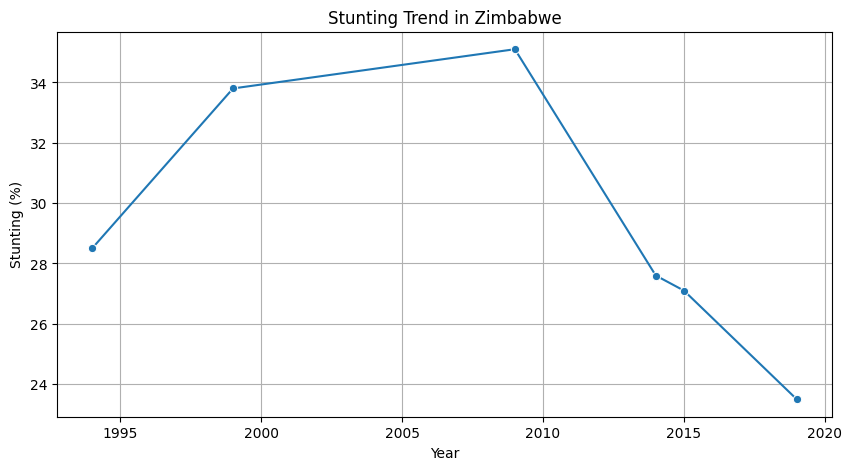

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to one country
country_data = filtered_df[filtered_df["Country"] == "ZIMBABWE"]

# Plot stunting over time
plt.figure(figsize=(10,5))
sns.lineplot(data=country_data, x="Survey_Year", y="Stunting", marker="o")
plt.title("Stunting Trend in Zimbabwe")
plt.ylabel("Stunting (%)")
plt.xlabel("Year")
plt.grid(True)
plt.show()


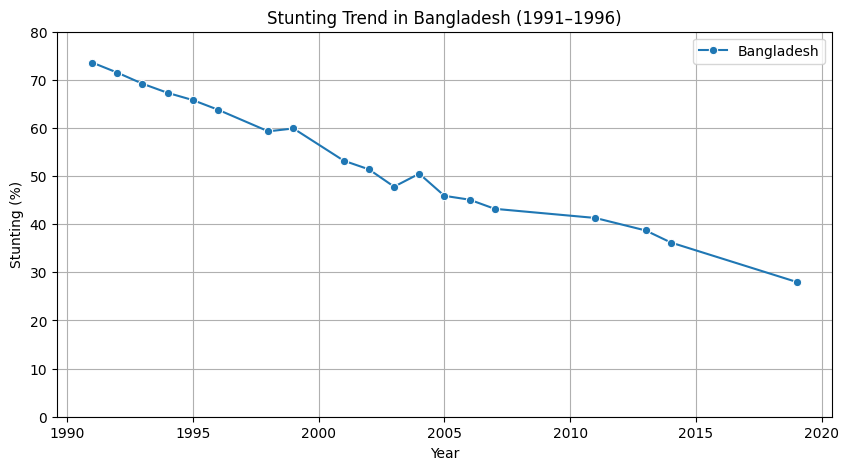

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

bd = filtered_df[filtered_df["Country"] == "BANGLADESH"]

plt.figure(figsize=(10, 5))
sns.lineplot(data=bd, x="Survey_Year", y="Stunting", marker="o", label="Bangladesh")
plt.title("Stunting Trend in Bangladesh (1991–1996)")
plt.xlabel("Year")
plt.ylabel("Stunting (%)")
plt.ylim(0, 80)
plt.grid(True)
plt.show()


In [30]:
filtered_df["High_Stunting_Flag"] = filtered_df["Stunting"].apply(lambda x: 1 if x >= 60 else 0)
high_stunt = filtered_df[filtered_df["High_Stunting_Flag"] == 1]

print("⚠️ Countries with Stunting >= 60%:")
print(high_stunt[["Country", "Survey_Year", "Stunting"]])


⚠️ Countries with Stunting >= 60%:
         Country  Survey_Year  Stunting
11        ANGOLA         1996      61.1
68    BANGLADESH         1991      73.6
69    BANGLADESH         1992      71.5
70    BANGLADESH         1993      69.2
71    BANGLADESH         1994      67.3
72    BANGLADESH         1995      65.8
73    BANGLADESH         1996      63.8
123      BURUNDI         2000      64.0
549    GUATEMALA         1987      66.2
861   MADAGASCAR         1992      60.5
1100       NEPAL         1996      65.7


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import joblib

# Load merged dataset
df = pd.read_csv(r"C:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\final_merged_malnutrition_data.csv")


# Define risk label from 'Stunting' levels (multi-class)
def risk_category(stunting):
    if pd.isna(stunting):
        return None
    elif stunting < 20:
        return "Low"
    elif stunting < 30:
        return "Moderate"
    elif stunting < 40:
        return "High"
    else:
        return "Very High"

# Apply risk category
df["Risk_Level"] = df["Stunting"].apply(risk_category)

# Drop rows with missing values in required fields
features = ["Stunting", "Wasting", "Underweight", "Overweight", "U5_Pop_Thousands"]
df_model = df.dropna(subset=features + ["Risk_Level"])

# Split features and target
X = df_model[features]
y = df_model["Risk_Level"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Save the model and scaler
joblib.dump(model, "malnutrition_risk_model.pkl")
joblib.dump(scaler, "feature_scaler.pkl")


# Return classification report
report


{'High': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 32.0},
 'Low': {'precision': 0.9743589743589743,
  'recall': 1.0,
  'f1-score': 0.987012987012987,
  'support': 38.0},
 'Moderate': {'precision': 1.0,
  'recall': 0.9523809523809523,
  'f1-score': 0.975609756097561,
  'support': 21.0},
 'Very High': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 34.0},
 'accuracy': 0.992,
 'macro avg': {'precision': 0.9935897435897436,
  'recall': 0.9880952380952381,
  'f1-score': 0.990655685777637,
  'support': 125.0},
 'weighted avg': {'precision': 0.9922051282051282,
  'recall': 0.992,
  'f1-score': 0.9919543870763383,
  'support': 125.0}}

In [46]:
import pandas as pd
import joblib

# Load the trained model and the scaler
model = joblib.load(r"C:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\malnutrition_risk_model.pkl")
scaler = joblib.load(r"C:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\feature_scaler.pkl")

# Define test samples (simulate Low → Very High risk levels based on Stunting)
test_samples = {
    'Stunting': [12.5, 25.8, 35.3, 42.7],         # Key driver of risk level
    'Wasting': [6.4, 9.1, 13.3, 18.0],
    'Underweight': [10.2, 18.9, 25.6, 33.4],
    'Overweight': [7.2, 6.1, 5.0, 3.2],
    'U5_Pop_Thousands': [10.1, 8.6, 12.3, 7.9]
}

# Convert to DataFrame
input_df = pd.DataFrame(test_samples)

# Apply feature scaling
input_scaled = scaler.transform(input_df)

# Make predictions
predictions = model.predict(input_scaled)

# Display results
for i, pred in enumerate(predictions, 1):
    print(f"Sample {i} → ✅ Predicted Malnutrition Risk Category: {pred}")


Sample 1 → ✅ Predicted Malnutrition Risk Category: Low
Sample 2 → ✅ Predicted Malnutrition Risk Category: Moderate
Sample 3 → ✅ Predicted Malnutrition Risk Category: High
Sample 4 → ✅ Predicted Malnutrition Risk Category: Very High


In [36]:
# Inspect features used during training
try:
    feature_names = model.feature_names_in_
    print("✅ Model expects the following features:")
    for i, feature in enumerate(feature_names, 1):
        print(f"{i}. {feature}")
except AttributeError:
    print("❌ The model does not have 'feature_names_in_' attribute.")
    print("👉 This usually happens if the model was not trained using a DataFrame or was saved without metadata.")
    print("📌 You’ll need to manually check the training script to identify the expected features.")


❌ The model does not have 'feature_names_in_' attribute.
👉 This usually happens if the model was not trained using a DataFrame or was saved without metadata.
📌 You’ll need to manually check the training script to identify the expected features.


In [39]:
import pandas as pd

# Replace with correct name
df = pd.read_csv(r"C:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\correct_dataset_name.csv")

print("Columns used during training:")
print(df.columns.tolist())


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\jnthn\\OneDrive\\Desktop\\Project Source Codes\\Malnutrition-Detection-Project-using-ML\\backend\\correct_dataset_name.csv'

In [10]:
df['Status'].value_counts()

Status
Stunting       696
Overweight      94
Underweight     43
Wasting          4
Name: count, dtype: int64

In [11]:
df.describe()

,Sex,Age,Height,Weight,Low Income,Lower Middle Income,Upper Middle Income
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,0.502987,2.947431,88.559140,14.463560,0.227001,0.397849,0.291517
std,0.500290,1.406447,10.821536,3.457559,0.419144,0.489747,0.454733
min,0.000000,1.000000,70.000000,9.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,80.000000,11.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,89.000000,15.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,98.000000,17.000000,0.000000,1.000000,1.000000
max,1.000000,5.000000,107.000000,20.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Low Income'}>,
        <Axes: title={'center': 'Lower Middle Income'}>],
       [<Axes: title={'center': 'Upper Middle Income'}>, <Axes: >,
        <Axes: >]], dtype=object)

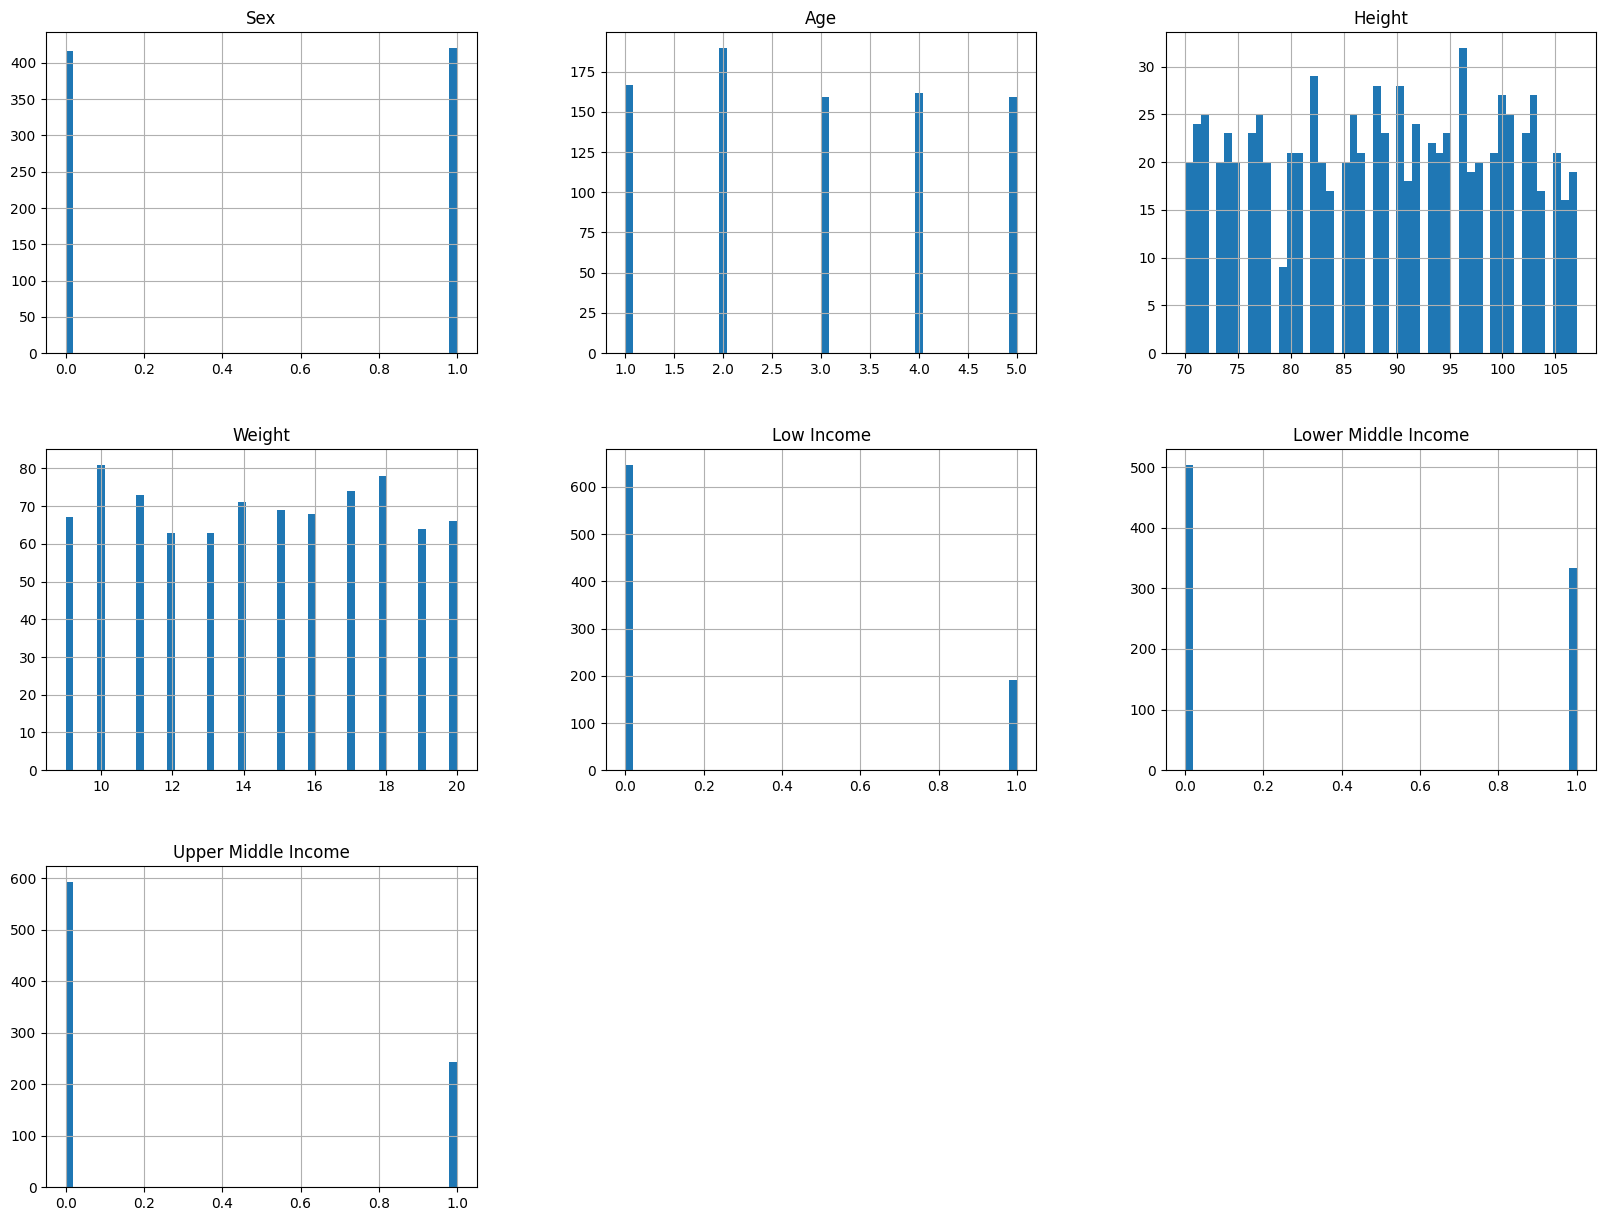

In [12]:
df.hist(bins=50, figsize=(20,15))

In [13]:
# Visualising informaiton about the Status column which is categorical data

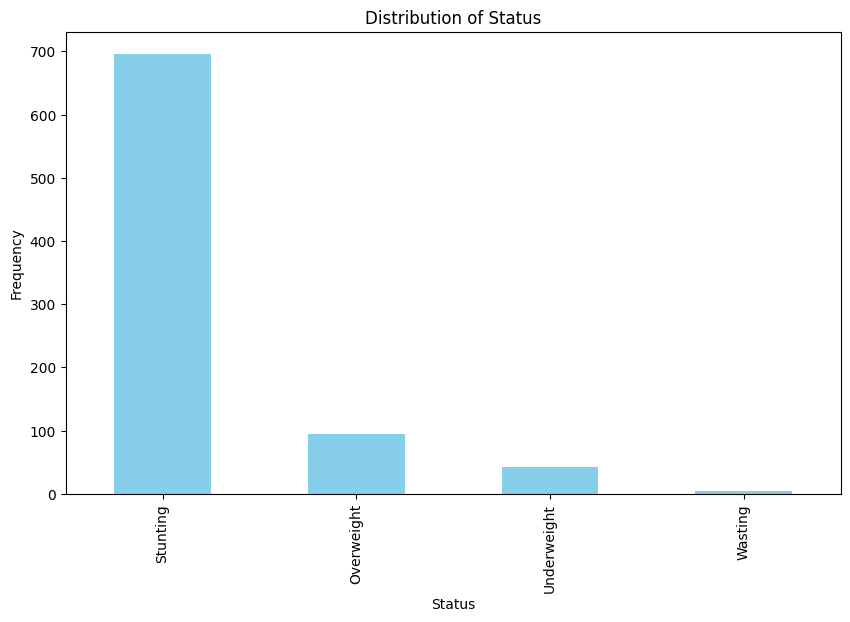

In [14]:
df['Status'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.show()

In [15]:
print(df.columns)

Index(['Sex', 'Age', 'Height', 'Weight', 'Low Income', 'Lower Middle Income',
       'Upper Middle Income', 'Status'],
      dtype='object')


In [16]:
# Removing the unwanted columns as seen below:

In [17]:
df = df.drop('Low Income '.strip(), axis=1)
df = df.drop('Lower Middle Income '.strip(), axis=1)
df = df.drop('Upper Middle Income '.strip(), axis=1)

In [19]:
df.describe()

,Sex,Age,Height,Weight
count,837.000000,837.000000,837.000000,837.000000
mean,0.502987,2.947431,88.559140,14.463560
std,0.500290,1.406447,10.821536,3.457559
min,0.000000,1.000000,70.000000,9.000000
25%,0.000000,2.000000,80.000000,11.000000
50%,1.000000,3.000000,89.000000,15.000000
75%,1.000000,4.000000,98.000000,17.000000
max,1.000000,5.000000,107.000000,20.000000


In [20]:
# Separating the labels and features

In [21]:
X = df.drop("Status", axis=1)  # Features
y = df["Status"]  # Labels

# X = df.iloc[:, :4]
# y = df.iloc[:, 4]

In [22]:
# Visualising the interger type data using a histogram

array([[<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

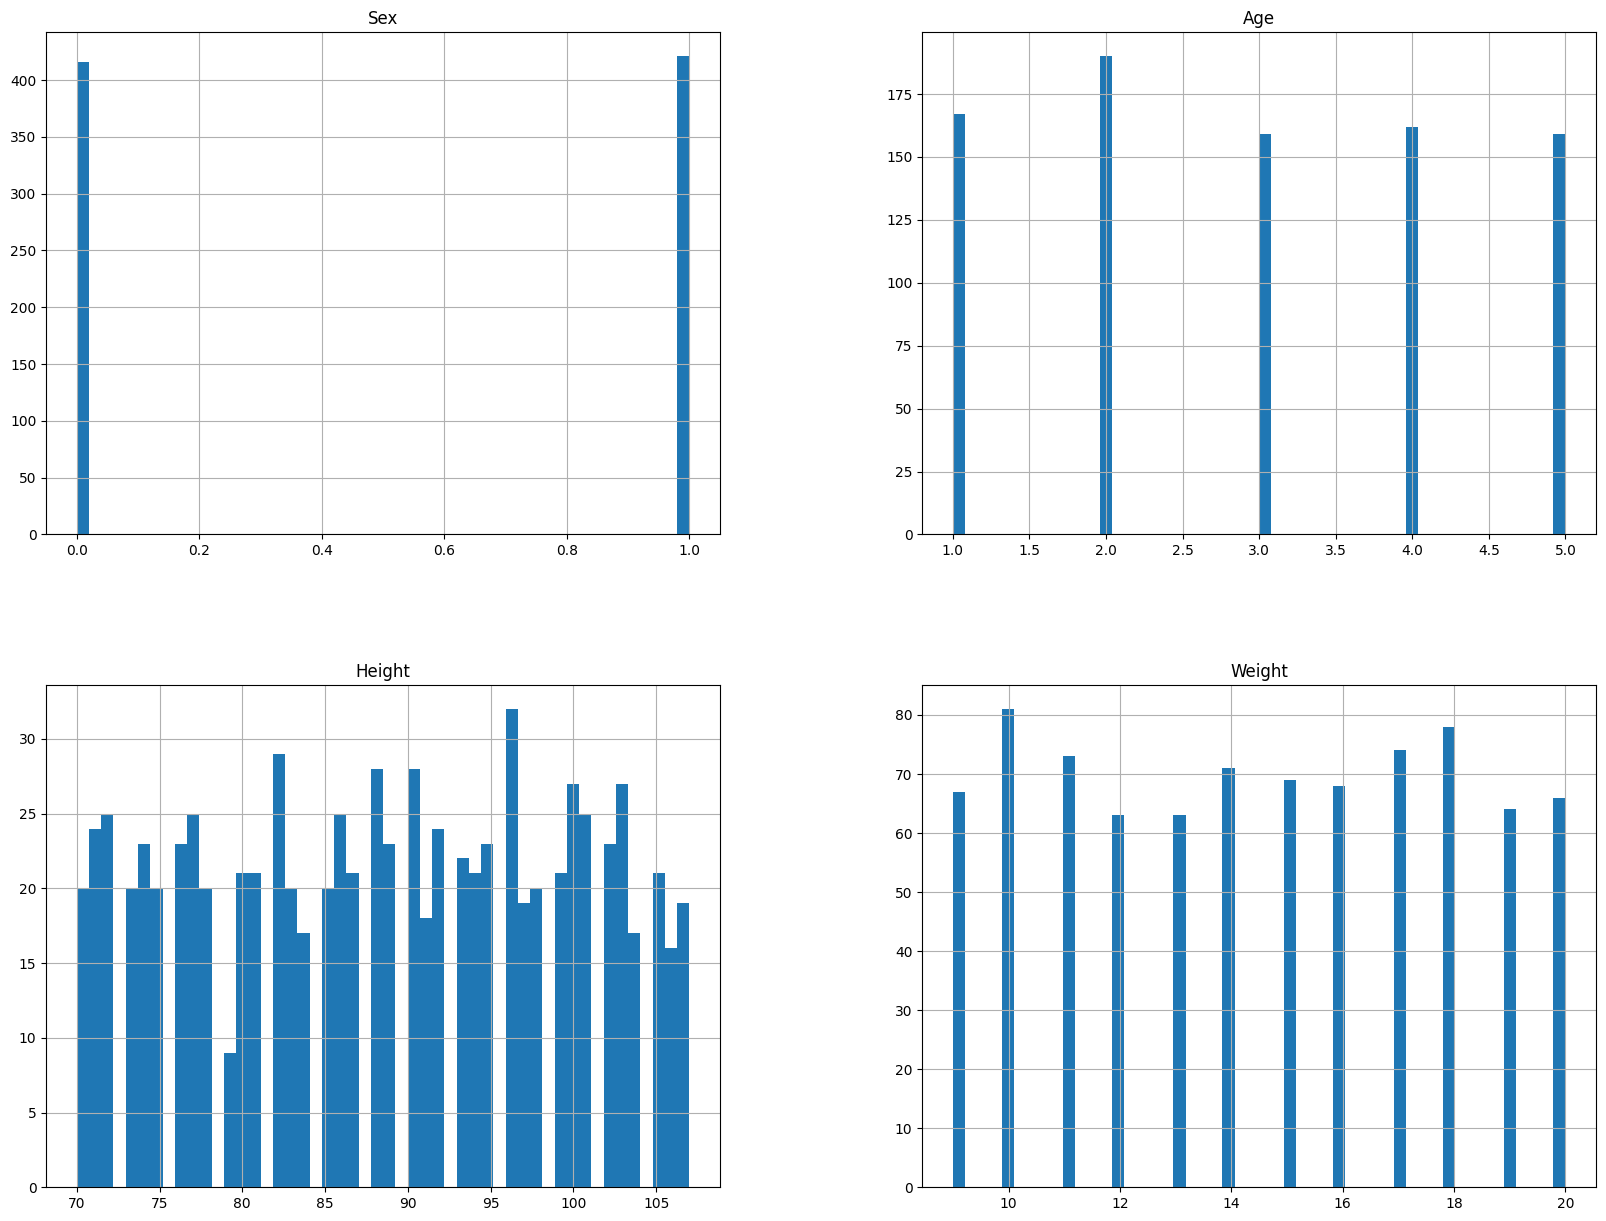

In [23]:
df.hist(bins=50, figsize=(20,15))

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sex     837 non-null    int64 
 1   Age     837 non-null    int64 
 2   Height  837 non-null    int64 
 3   Weight  837 non-null    int64 
 4   Status  837 non-null    object
dtypes: int64(4), object(1)
memory usage: 32.8+ KB


In [25]:
# df_plot = pd.concat([X, y], axis=1)

# # Create a box plot
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=df_plot, x='Status', y='Height') 
# plt.title('Box Plot of Age by Status')
# plt.show()

In [26]:
# df_plot = pd.concat([X, y], axis=1)

# # Create box plots for all features
# plt.figure(figsize=(16, 10))
# sns.boxplot(data=df_plot.drop('Status', axis=1))
# plt.title('Box Plots of Features by Status')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
# plt.show()

In [27]:
## Splitting the dataset into training, validation and testing

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [30]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the 'temp' sets into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (585, 4) (585,)
Validation set: (126, 4) (126,)
Testing set: (126, 4) (126,)


In [31]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=300)
# model.fit(X_train, y_train)

In [32]:
# predict = model.predict(X_temp)
# predict

In [33]:
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# print(confusion_matrix(y_temp, predict))
# print(classification_report(y_temp, predict))
# print("Accuracy Of Our Model Is:-",accuracy_score(y_temp, predict)*100, "%")

In [34]:
# rf_classifier = RandomForestClassifier(random_state=42)

# # Train the classifier on the training set
# rf_classifier.fit(X_train, y_train)

# # Make predictions on the validation set
# y_val_pred = rf_classifier.predict(X_val)

# # Evaluate the accuracy on the validation set
# val_accuracy = accuracy_score(y_val, y_val_pred)*100
# print(f'Validation Accuracy: {val_accuracy:.2f}')

# # Make predictions on the test set
# y_test_pred = rf_classifier.predict(X_test)

# # Evaluate the accuracy on the test set
# test_accuracy = accuracy_score(y_test, y_test_pred)*100
# print(f'Test Accuracy: {test_accuracy:.2f}')

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train the model on the training set
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)

# Predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model on the validation set
print("Validation Set:")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_val, y_val_pred) * 100))

# Predictions on the temporary set
y_temp_pred = model.predict(X_temp)

# Evaluate the model on the temporary set
print("\nTemporary Set:")
print(confusion_matrix(y_temp, y_temp_pred))
print(classification_report(y_temp, y_temp_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_temp, y_temp_pred) * 100))


Validation Set:
[[  2   8   0   0]
 [  5 103   2   0]
 [  1   4   0   0]
 [  0   1   0   0]]
              precision    recall  f1-score   support

  Overweight       0.25      0.20      0.22        10
    Stunting       0.89      0.94      0.91       110
 Underweight       0.00      0.00      0.00         5
     Wasting       0.00      0.00      0.00         1

    accuracy                           0.83       126
   macro avg       0.28      0.28      0.28       126
weighted avg       0.80      0.83      0.81       126

Accuracy: 83.33%

Temporary Set:
[[  2  25   1   0]
 [ 10 194   7   0]
 [  2  10   0   0]
 [  0   1   0   0]]
              precision    recall  f1-score   support

  Overweight       0.14      0.07      0.10        28
    Stunting       0.84      0.92      0.88       211
 Underweight       0.00      0.00      0.00        12
     Wasting       0.00      0.00      0.00         1

    accuracy                           0.78       252
   macro avg       0.25      0.25   

c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWar

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train the model on the training set
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)

# Predictions on the validation set
y_val_pred = model.predict(X_val)

# Print the predicted labels and compare with the actual labels
print("Predicted Labels:", y_val_pred)
print("Actual Labels   :", y_val.tolist())  # Convert y_val to a list for easy comparison

# Evaluate the model on the validation set
print("Validation Set:")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_val, y_val_pred) * 100))


Predicted Labels: ['Stunting' 'Stunting' 'Overweight' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Overweight' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Overweight' 'Stunting'
 'Underweight' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Overweight' 'Overweight'
 'Stunting' 'Stunting' 'Stunting' 'Underweight' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Overweight'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Underweight' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Underweight'
 'Stunting' 'Stuntin

c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWar

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train the model on the training set
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)

# Predictions on the test set
y_test_pred = model.predict(X_test)

# Print the predicted labels and compare with the actual labels
print("Predicted Labels (Test Set):", y_test_pred)
print("Actual Labels (Test Set)   :", y_test.tolist())  # Convert y_test to a list for easy comparison

# Evaluate the model on the test set
print("\nTest Set:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_test_pred) * 100))




Predicted Labels (Test Set): ['Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Overweight' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Overweight' 'Stunting' 'Underweight'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Underweight'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Overweight' 'Stunting' 'Stunting' 'Underweight' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunt

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your labels
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the 'temp' sets into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create an SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can adjust the kernel and other parameters based on your data

# Train the SVM model on the training set
svm_model.fit(X_train, y_train)

# Predictions on the validation set
y_val_pred = svm_model.predict(X_val)

# Evaluate the SVM model on the validation set
print("Validation Set:")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_val, y_val_pred) * 100))

# Predictions on the test set
y_test_pred = svm_model.predict(X_test)

# Evaluate the SVM model on the test set
print("\nTest Set:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_test_pred) * 100))


Validation Set:
[[  0  10   0   0]
 [  0 110   0   0]
 [  0   5   0   0]
 [  0   1   0   0]]
              precision    recall  f1-score   support

  Overweight       0.00      0.00      0.00        10
    Stunting       0.87      1.00      0.93       110
 Underweight       0.00      0.00      0.00         5
     Wasting       0.00      0.00      0.00         1

    accuracy                           0.87       126
   macro avg       0.22      0.25      0.23       126
weighted avg       0.76      0.87      0.81       126

Accuracy: 87.30%

Test Set:
[[  0  18   0]
 [  0 101   0]
 [  0   7   0]]
              precision    recall  f1-score   support

  Overweight       0.00      0.00      0.00        18
    Stunting       0.80      1.00      0.89       101
 Underweight       0.00      0.00      0.00         7

    accuracy                           0.80       126
   macro avg       0.27      0.33      0.30       126
weighted avg       0.64      0.80      0.71       126

Accuracy: 80.16%


c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWar

In [39]:
# Below, I used neural networks

In [43]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils.multiclass import unique_labels

# =========================
# 1. Load and Preprocess the Dataset
# =========================

# Load your dataset
data = pd.read_csv('Malnutrition data.csv')

# Handle missing values (drop or fill as needed)
data.dropna(inplace=True)  # Could use data.fillna(method='ffill') for imputation instead

# One-hot encode the 'Sex' column to handle categorical values (drop_first=True avoids dummy trap)
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

# Encode the 'Status' column (target) into numerical format
label_encoder = LabelEncoder()
data['Status'] = label_encoder.fit_transform(data['Status'])  # Example: Malnourished = 1, Normal = 0, etc.

# Separate features and target
X = data.drop('Status', axis=1)
y = data['Status']

# Convert to NumPy arrays and enforce float32 dtype (required by TensorFlow)
X = X.to_numpy().astype(np.float32)
y = y.to_numpy().astype(np.float32)

# =========================
# 2. Split the Data
# =========================

# Split into training (70%) and temporary (30%) set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary set equally into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# =========================
# 3. Define and Train the Neural Network
# =========================

# Build a simple dense neural network
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# =========================
# 4. Evaluate the Model
# =========================

# Helper to map numeric predictions back to label names
label_map = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

def evaluate_model(X, y_true, dataset_name=""):
    # Predict probabilities and convert to class predictions
    y_pred_prob = model.predict(X)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Flatten for shape consistency

    # Get actual labels present in this dataset
    present_labels = unique_labels(y_true, y_pred)
    target_names = [label_map[label] for label in present_labels]

    # Print evaluation metrics
    print(f"\n📊 {dataset_name} Evaluation:")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred, labels=present_labels, target_names=target_names))
    print("Accuracy: {:.2f}%".format(accuracy_score(y_true, y_pred) * 100))

# Evaluate on validation and test sets
evaluate_model(X_val, y_val, dataset_name="Validation Set")
evaluate_model(X_test, y_test, dataset_name="Test Set")


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1604 - loss: 10.6604 - val_accuracy: 0.8730 - val_loss: 0.1448
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8234 - loss: 0.4190 - val_accuracy: 0.8730 - val_loss: 0.2251
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8006 - loss: 0.5344 - val_accuracy: 0.8730 - val_loss: 0.1740
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8685 - loss: 0.4072 - val_accuracy: 0.8730 - val_loss: 0.1121
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8175 - loss: 0.2329 - val_accuracy: 0.8730 - val_loss: 0.1219
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8402 - loss: 0.1931 - val_accuracy: 0.8730 - val_loss: 0.1151
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8421 - loss: 0.2232 - val_accuracy: 0.8730 - val_loss: 0.1031
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8103 - loss: 0.2117 - val_accuracy: 0.8730 - val_loss

c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWar

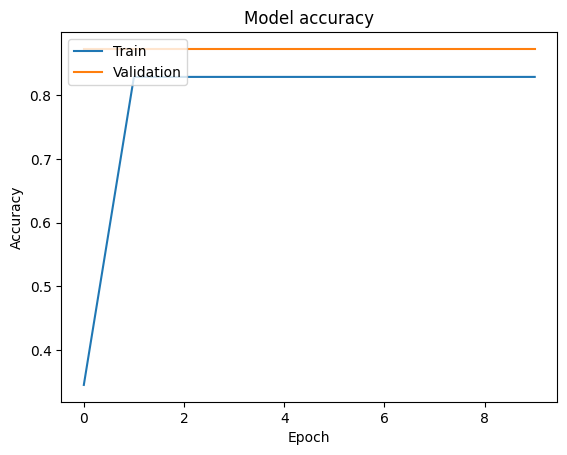

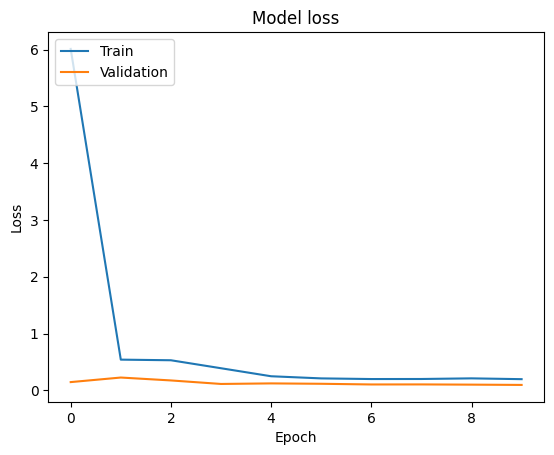

In [44]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [45]:
# In the code below, I encoded the non-numeric label to numeric and used the SVM algorithm 

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming X contains your features and y contains your labels
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the 'temp' sets into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Encode non-numeric labels in y_train using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create an SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model on the training set
svm_model.fit(X_train, y_train_encoded)

# Encode non-numeric labels in y_val and y_test
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Predictions on the validation set
y_val_pred = svm_model.predict(X_val)

# Evaluate the SVM model on the validation set
print("Validation Set:")
print(confusion_matrix(y_val_encoded, y_val_pred))
print(classification_report(y_val_encoded, y_val_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_val_encoded, y_val_pred) * 100))

# Predictions on the test set
y_test_pred = svm_model.predict(X_test)

# Evaluate the SVM model on the test set
print("\nTest Set:")
print(confusion_matrix(y_test_encoded, y_test_pred))
print(classification_report(y_test_encoded, y_test_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test_encoded, y_test_pred) * 100))



Validation Set:
[[  6   4   0   0]
 [  1 109   0   0]
 [  0   5   0   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.92      0.99      0.96       110
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1

    accuracy                           0.91       126
   macro avg       0.42      0.40      0.41       126
weighted avg       0.87      0.91      0.89       126

Accuracy: 91.27%

Test Set:
[[10  8  0]
 [ 5 96  0]
 [ 0  7  0]]
              precision    recall  f1-score   support

           0       0.67      0.56      0.61        18
           1       0.86      0.95      0.91       101
           2       0.00      0.00      0.00         7

    accuracy                           0.84       126
   macro avg       0.51      0.50      0.50       126
weighted avg       0.79      0.84      0.81       126

Accuracy: 84.13%


c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWar

In [47]:
# Below, I encoded the non numeric labels to numeric and used Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'status' is the column to be encoded in your dataset
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)  # Assuming you have a validation set 'y_val'

# Train the model on the training set
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train_encoded)

# Predictions on the test set
y_test_pred_encoded = model.predict(X_test)
y_val_pred_encoded = model.predict(X_val)  # Assuming you have a validation set 'X_val'

# Decode the predicted labels back to original status labels
y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded)
y_val_pred = label_encoder.inverse_transform(y_val_pred_encoded)

# Print the predicted labels and compare with the actual labels for both test and validation sets
print("Test Set:")
print("Predicted Labels (Test Set):", y_test_pred)
print("Actual Labels (Test Set)   :", y_test.tolist())  # Convert y_test to a list for easy comparison
print("\nValidation Set:")
print("Predicted Labels (Validation Set):", y_val_pred)
print("Actual Labels (Validation Set)   :", y_val.tolist())  # Convert y_val to a list for easy comparison

# Evaluate the model on the test set
print("\nTest Set:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_test_pred) * 100))

# Evaluate the model on the validation set
print("\nValidation Set:")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_val, y_val_pred) * 100))


Test Set:
Predicted Labels (Test Set): [1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 1.]
Actual Labels (Test Set)   : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 2.0, 1.0, 0.0, 0.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0

c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWar

In [49]:
## Checking the matching of the numeric values and there corresponding actual label values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'status' is the column to be encoded in your dataset
label_encoder = LabelEncoder()

# Create a sample DataFrame with your data
# Replace this with your actual dataset
data = {'status': ['Stunting', 'Overweight', 'Underweight', 'Wasting', 'Stunting']}
df = pd.DataFrame(data)

# Fit and transform the LabelEncoder on the original label column
encoded_labels = label_encoder.fit_transform(df['status'])

# Print the mapping between encoded values and original labels
print("Encoded Labels:")
for label, encoded_value in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"Encoded Value: {encoded_value} -> Original Label: {label}")


Encoded Labels:
Encoded Value: 0 -> Original Label: Overweight
Encoded Value: 1 -> Original Label: Stunting
Encoded Value: 2 -> Original Label: Underweight
Encoded Value: 3 -> Original Label: Wasting


In [50]:
## Trying out SMOTE

In [51]:
# pip install -U imbalanced-learn

In [54]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd  # Ensure pandas is imported

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print initial shapes
print("Before SMOTE - Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)

# Get the smallest class size in y_train
min_class_samples = pd.Series(y_train).value_counts().min()

# Ensure k_neighbors < min_class_samples
k_neighbors = min(6, min_class_samples - 1)
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)

# Apply SMOTE to training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print updated training shapes
print("\nAfter SMOTE - Resampled Training set:", X_train_resampled.shape, y_train_resampled.shape)


Before SMOTE - Training set: (585, 7) (585,)
Validation set: (126, 7) (126,)
Testing set: (126, 7) (126,)

After SMOTE - Resampled Training set: (1940, 7) (1940,)


c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\jnthn\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\jnthn\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(

In [56]:
# Print the distribution of the target variable before and after SMOTE
print("Before SMOTE - Training set:")
print(pd.Series(y_train).value_counts())

print("\nAfter SMOTE - Resampled Training set:")
print(pd.Series(y_train_resampled).value_counts())

print("\nValidation set:")
print(pd.Series(y_val).value_counts())

print("\nTesting set:")
print(pd.Series(y_test).value_counts())
print(pd.Series(y_train).value_counts(normalize=True) * 100)


Before SMOTE - Training set:
1.0    485
0.0     66
2.0     31
3.0      3
Name: count, dtype: int64

After SMOTE - Resampled Training set:
1.0    485
0.0    485
2.0    485
3.0    485
Name: count, dtype: int64

Validation set:
1.0    110
0.0     10
2.0      5
3.0      1
Name: count, dtype: int64

Testing set:
1.0    101
0.0     18
2.0      7
Name: count, dtype: int64
1.0    82.905983
0.0    11.282051
2.0     5.299145
3.0     0.512821
Name: proportion, dtype: float64


In [61]:
original_columns = data.drop('Status', axis=1).columns
print("Original columns:", list(original_columns))


Original columns: ['Age', 'Height', 'Weight', 'Low Income', 'Lower Middle Income', 'Upper Middle Income', 'Sex_1']


In [62]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 0: Save column names from the original DataFrame (data must be available)
original_columns = data.drop('Status', axis=1).columns
print("Original columns:", list(original_columns))  # Optional: to verify

# Step 1: Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes before resampling
print("Before SMOTE - Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)

# Step 2: Check number of samples in the smallest class of y_train
min_class_samples = pd.Series(y_train).value_counts().min()

# Step 3: Apply SMOTE only to the training set
k_neighbors = min(6, int(min_class_samples - 1))
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 4: Convert arrays to DataFrames for column handling
X_train_resampled = pd.DataFrame(X_train_resampled, columns=original_columns)
X_val = pd.DataFrame(X_val, columns=original_columns)
X_test = pd.DataFrame(X_test, columns=original_columns)

# Step 5: Remove unwanted features from all sets
columns_to_remove = ["Low Income", "Lower Middle Income", "Upper Middle Income"]
X_train_resampled = X_train_resampled.drop(columns=columns_to_remove, axis=1)
X_val = X_val.drop(columns=columns_to_remove, axis=1)
X_test = X_test.drop(columns=columns_to_remove, axis=1)

# Final output
print("\nAfter SMOTE - Resampled Training set:", X_train_resampled.shape, y_train_resampled.shape)


Original columns: ['Age', 'Height', 'Weight', 'Low Income', 'Lower Middle Income', 'Upper Middle Income', 'Sex_1']
Before SMOTE - Training set: (585, 7) (585,)
Validation set: (126, 7) (126,)
Testing set: (126, 7) (126,)

After SMOTE - Resampled Training set: (1940, 4) (1940,)


In [64]:
# List of columns to be removed
columns_to_remove = ["Low Income", "Lower Middle Income", "Upper Middle Income"]

# Filter out only those columns that exist in the DataFrame
columns_present = [col for col in columns_to_remove if col in X_train_resampled.columns]

# Drop the specified columns safely
X_train_resampled_filtered = X_train_resampled.drop(columns=columns_present, axis=1)

# Display the resulting DataFrame
print("\nFiltered training set (after removing income categories):")
print(X_train_resampled_filtered.head())



Filtered training set (after removing income categories):
   Age  Height  Weight  Sex_1
0  5.0    82.0    10.0    1.0
1  5.0    82.0    16.0    0.0
2  3.0   104.0    10.0    1.0
3  5.0    70.0    18.0    0.0
4  1.0    91.0    20.0    1.0


In [66]:
# =========================
# Inspect Resampled Dataset (After Column Removal)
# =========================

# Display the first few rows of the modified feature DataFrame
print("🧾 Features after removing specified income columns:")
print(X_train_resampled_filtered.head())

# Display the column names of the modified feature DataFrame
print("\n📌 Feature column names after removal:")
print(list(X_train_resampled_filtered.columns))

# Display the first few rows of the target variable (labels)
print("\n🏷️ Labels in the resampled training set:")
print(pd.Series(y_train_resampled).head())


🧾 Features after removing specified income columns:
   Age  Height  Weight  Sex_1
0  5.0    82.0    10.0    1.0
1  5.0    82.0    16.0    0.0
2  3.0   104.0    10.0    1.0
3  5.0    70.0    18.0    0.0
4  1.0    91.0    20.0    1.0

📌 Feature column names after removal:
['Age', 'Height', 'Weight', 'Sex_1']

🏷️ Labels in the resampled training set:
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float32


In [67]:
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)


In [ ]:
# Removing unwanted features from the dataset

In [42]:
# import pandas as pd

# # Assuming your original dataset is df
# # List of columns to be removed
# columns_to_remove = ["Low Income", "Lower Middle Income", "Upper Middle Income"]

# # Create a new DataFrame with the specified columns removed
# df_filtered = df.drop(columns=columns_to_remove, axis=1)

# # Display the resulting DataFrame
# print(df_filtered.head())




In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Ensure test and validation sets have the same columns as training data
missing_cols_test = set(X_train_resampled_filtered.columns) - set(X_test.columns)
missing_cols_val = set(X_train_resampled_filtered.columns) - set(X_val.columns)

# Add missing columns with value 0
for col in missing_cols_test:
    X_test[col] = 0
for col in missing_cols_val:
    X_val[col] = 0

# Ensure column order matches training data
X_test = X_test[X_train_resampled_filtered.columns]
X_val = X_val[X_train_resampled_filtered.columns]

# Encode target variable ('status' column)
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

# Train the RandomForest model on the resampled training set
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train_resampled_filtered, y_train_resampled_encoded)

# Make predictions on the test and validation sets
y_test_pred_encoded = model.predict(X_test)
y_val_pred_encoded = model.predict(X_val)

# Decode predicted labels back to original category names
y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded)
y_val_pred = label_encoder.inverse_transform(y_val_pred_encoded)

# Convert y_test and y_val to lists for easy comparison
y_test_list = y_test.tolist()
y_val_list = y_val.tolist()

# Print the predicted labels and actual labels
print("\n🔹 Test Set:")
print("Predicted Labels:", y_test_pred)
print("Actual Labels   :", y_test_list)

print("\n🔹 Validation Set:")
print("Predicted Labels:", y_val_pred)
print("Actual Labels   :", y_val_list)

# Evaluate model on test set
print("\n📊 Test Set Evaluation:")
print(confusion_matrix(y_test_list, y_test_pred))
print(classification_report(y_test_list, y_test_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test_list, y_test_pred) * 100))

# Evaluate model on validation set
print("\n📊 Validation Set Evaluation:")
print(confusion_matrix(y_val_list, y_val_pred))
print(classification_report(y_val_list, y_val_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_val_list, y_val_pred) * 100))



🔹 Test Set:
Predicted Labels: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 2. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 2. 1. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 2. 2. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 1.]
Actual Labels   : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 2.0, 1.0, 0.0, 0.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 

c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jnthn\OneDrive\Desktop\Project Source Codes\Malnutrition-Detection-Project-using-ML\backend\maln_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWar